# Final Project - Charles Griego
## Exploring NSF Graduate Research Fellowship Recipients

### Introduction

Every year, the NSF awards on average 2000 fellowships to young graduate students through the Graduate Research Fellowship Program (GRFP). This award gives students financial support and more freedom to choose a graduate university and a research lab. Universities highly encourage students to apply because it helps boost careers and also eases the burden on faculty to raise their own funding to support graduate students. However, studies suggest that this award disproportionally goes to students at top schools because [they encourage more students to apply.](https://www.sciencemag.org/careers/2019/08/nsf-graduate-fellowships-disproportionately-go-students-few-top-schools)

Being a recipient of this award at the University of Pittsburgh, I've become aware that the institution is concerned that too few students are applying and, as a result, receiving little awards as compared to other schools in Pennsylvania. Due to my relations with this topic, I chose to investigate how awards are distributed among universities from the last ten years (2011-2020). This investigation was possible because NSF provides accessible lists of award winners and honorable mentions for [every award year.](https://www.research.gov/grfp/AwardeeList.do?method=loadAwardeeList) These lists are exportable as CSV files (separated by year and award winner/honorable mention) and contain information about a recipient's name, baccalaureate institution, current institution, and field of study.

This study is completed using primarily [Pandas.](https://pandas.pydata.org/) This notebook outlines building a DataFrame with all of the data, cleaning some of the data, and analyzing distributions of awards to schools with interactive visualizations. A major component of this notebook is the data cleaning process. The NSF data is collected when a student applies for the award, so information like institution names was typed by the applicant. Thus, there are inconsistencies in the ways that institution names are recorded. For instance, some have different abbreviations, different letter casing, use of symbols, and typos. Here, inistitution names are formatted to match names from an external list, so that entries can be grouped together by university name as accurately as possible. The clean data set is then saved to a new CSV so that users of this notebook can do their own analysis. Finally, we investigate the numbers of awards that belong to top universities.

### Methods

Below we walk through all the code to setup the dataset. First, we must import `pandas`, which is the primary Python library used in this notebook.

In [1]:
import pandas as pd

CSV files of NSF GRFP recipients, separated by year, were manually extracted to do this analysis. To access these files, unzip the file `nsf_grfp_recipients_2011_2020_separated.zip` and store them in the same directory as this notebook.

#### Building the DataFrame
Below is a function that reads the CSV files using the `read_csv()` function. A consistent naming scheme was developed so that every file can be read in a loop. Each file is read into a pandas DataFrame `df1`, a second DataFrame `df2` is then defined with the pertinent columns, and then new columns are added to describe the year and the recipients status (award or honorable mention). The names of the recipients aren't included so that the dataset is anonymous. Each DataFrame is stored in a list which is concatanated into a single DataFrame.

In [2]:
def read_data(years, status):
    
    dflist = []
    for year in years:
        df1 = pd.read_csv(f'{year}{status}.csv',
                         index_col=None,
                         header=0,
                         encoding='latin-1')
        
        df2 = pd.DataFrame({'Baccalaureate Institution':df1['Baccalaureate Institution'],
                            'Current Institution':df1['Current Institution'],
                            'Field of Study':df1['Field of Study'],
                            'Year':[year]*len(df1),
                            'Status':[status]*len(df1)})

        dflist.append(df2)

    df_all = pd.concat(dflist, axis=0, ignore_index=True)
    
    return df_all

Next, a list of years is made to select the files. We are interested in the most recent ten years, 2011-2020.

In [3]:
import numpy as np
years = [str(int(y)) for y in np.linspace(2011,2020,10)]

##### Award Winners
Here we use the function `read_data()` that was defined above to make a dataframe of award winners.

In [4]:
awards = read_data(years, 'award')
awards.head()

,Baccalaureate Institution,Current Institution,Field of Study,Year,Status
0,University of Minnesota-Twin Cities,University of Minnesota-Twin Cities,Chemistry - Analytical,2011,award
1,University of Southern Mississippi,University of Southern Mississippi,Chemistry - Polymer,2011,award
2,University of New Mexico,University of Washington,Life Sciences - Molecular Biology,2011,award
3,University of Texas at Austin,UNIVERSITY OF CALIFORNIA BERKELEY,Life Sciences - Developmental Biology,2011,award
4,Vanderbilt University,Vanderbilt University,Life Sciences - Biophysics,2011,award


Above, we can see that we have appropriately define the correct columns to investigate.

In [5]:
awards.describe()

,Baccalaureate Institution,Current Institution,Field of Study,Year,Status
count,20612,18726,20612,20612,20612
unique,1236,801,811,10,1
top,Massachusetts Institute of Technology,Stanford University,Life Sciences - Ecology,2011,award
freq,494,823,1098,2077,20612


Using `describe()`, we can already get an idea about the awards distribution. Massachusetts Institute of Technology (MIT) is the most common institution that produced award winners, with a total of 494 awards. 823 award winners pursued their graduate degree at Standford University, and 1098 were awarded to students studying ecology.

##### Honorable Mentions
Next we make a dataframe of honorable mentions.

In [6]:
mentions = read_data(years, 'mention')
mentions.head()

,Baccalaureate Institution,Current Institution,Field of Study,Year,Status
0,Oberlin College,Florida International University,Life Sciences - Ecology,2011,mention
1,New College of Florida,UNIVERSITY OF CALIFORNIA BERKELEY,Psychology - Computational Psychology,2011,mention
2,University of Massachusetts Amherst,University of Massachusetts Amherst,Life Sciences - Developmental Biology,2011,mention
3,Indiana University-Purdue University at Indian...,Indiana University,Psychology - Cognitive Neuroscience,2011,mention
4,Brandeis University,NaN,Life Sciences - Ecology,2011,mention


In [7]:
mentions.describe()

,Baccalaureate Institution,Current Institution,Field of Study,Year,Status
count,18373,17067,18373,18373,18373
unique,1183,781,784,10,1
top,UNIVERSITY OF CALIFORNIA BERKELEY,Stanford University,Life Sciences - Ecology,2016,mention
freq,324,551,1132,2865,18373


Again is a summary of the data. The most common baccalaureate institution for honorable mentions was the University of California Berkeley with 324 recipients. And again, Stanford University and Ecology were the most common graduate institutions and fields of study with 551 and 1132 honorable mention recipients, respectively.

Next, we merge the `awards` and `mentions` dataframes with `pd.concat()` so that we have all of the data in one place.

In [8]:
nsf = pd.concat([awards, mentions], axis=0, ignore_index=True)

Next, we check if any columns contains NaN values. Below, it appears that only the `Current Institution` column does. 

In [9]:
nsf.isna().any()

Baccalaureate Institution    False
Current Institution           True
Field of Study               False
Year                         False
Status                       False
dtype: bool

To make it more interprettable, all the NaNs are filled with the word "Undecided". Here, we're assuming that the applicant's did not fill this field because they were undergraduates that didn't know where they would be going for grad school.

In [10]:
nsf = nsf.fillna({'Current Institution':'Undecided'})
nsf.isna().any()

Baccalaureate Institution    False
Current Institution          False
Field of Study               False
Year                         False
Status                       False
dtype: bool

Now the DataFrame `nsf` is ready for the next steps of this analysis.

#### Formatting institution names

Though we did get a good summary of the data using `describe()`, we would like to know more about award distributions. Especially because `describe()` only considers the most frequent insititution names *that were recorded consistently.* We next reformat the institution names to match a standardized form taken from an external list of university names in the United States.

##### Removing capital letters

Here we find that these entries are case sensitive, making the number of unique institutions larger than it actually is.

In [11]:
print('Unique entries with no change:',len(nsf['Baccalaureate Institution'].unique()))
print('Unique entries with all lower case:',len(nsf['Baccalaureate Institution'].str.lower().unique()))

Unique entries with no change: 1530
Unique entries with all lower case: 1484


We can see that by making each entry lowercased, we significantly reduce the number of unique institution names in the `Baccalaureate Instituion` column. We'll make that change to that column and the `Current Institution` column.

In [12]:
nsf[['Baccalaureate Institution','Current Institution']] = (nsf[['Baccalaureate Institution',
                                                                 'Current Institution']]
                                                            .apply(lambda x: x.str.lower()))

Next, we use `.translate()` to remove any punctuation marks that may be in an entry. We use a library of punctuation marks from the `string` module.

In [13]:
import string

def remove_punctuation(x):
    return x.str.translate({ord(c): None for c in string.punctuation})

nsf[['Baccalaureate Institution','Current Institution']] = (nsf[['Baccalaureate Institution',
                                                            'Current Institution']]
                                                            .apply(remove_punctuation, axis=1))

print('Unique entries with punctuation removed:',
      len(nsf['Baccalaureate Institution'].unique()))

Unique entries with punctuation removed: 1457


We can see that this operation also helped reduce the number of unique entries in `Baccalaureate Institution`.

##### Comparing names to an external list

Now, we can cross-reference our data to an exisitng source. A JSON file of all world university names and domains was obtained from [this Github repository.](https://github.com/Hipo/university-domains-list)

Navigating the repository, we find a page with the raw text data and use `urllib.request` to store the data back into a new JSON file in the working directory. Then this file is read into a DataFrame `unis` using `read_json`.

In [14]:
url = 'https://raw.githubusercontent.com/Hipo/university-domains-list/master/world_universities_and_domains.json'

import urllib.request
urllib.request.urlretrieve(url, 'world_universities_and_domains.json')

unis = pd.read_json('world_universities_and_domains.json')
unis.head()

,web_pages,name,alpha_two_code,state-province,domains,country
0,[http://www.marywood.edu],Marywood University,PA,None,[marywood.edu],United States
1,"[https://www.cstj.qc.ca, https://ccmt.cstj.qc....",Cégep de Saint-Jérôme,CA,None,[cstj.qc.ca],Canada
2,[http://www.lindenwood.edu/],Lindenwood University,US,None,[lindenwood.edu],United States
3,[http://www.davietjal.org/],DAV Institute of Engineering & Technology,IN,Punjab,[davietjal.org],India
4,[http://www.lpu.in/],Lovely Professional University,IN,Punjab,[lpu.in],India


This DataFrame contains information about every university in the world. We can use this to extract every university in the United States by filtering the `country` column in `unis`, making the `usa_unis` DataFrame. Also, we chain the operations we used above to make the names in `usa_unis` lowercase and remove punctuation marks. Now the external list is in the same format as the `nsf` list.

In [15]:
usa_unis = unis[unis['country'] == 'United States']

usa_unis['name'] = usa_unis['name'].str.lower().apply(lambda x: x.translate({ord(c): None for c in string.punctuation}))
usa_unis = usa_unis['name'].sort_values().unique()

print('Number of Universities in the United States: ',len(usa_unis))

Number of Universities in the United States:  2149


C:\Users\CDG36\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Below are several functions that are used to reformat names that aren't found in `usa_unis`.

First is `find_in_uni_list()`. This functions checks if a supplied name is in the `usa_unis` list. If it is, the variable `check` is set to equal 1. If the name isn't found, then `check = 0`.

In [16]:
def find_in_uni_list(x, uni_list):
    check = 0
    for u_name in uni_list:
         if x == u_name:
            check = 1
    return check

Next is `check_similar`. This function is intended for names that don't have a direct match in `usa_unis`. Here the function `token_set_ratio` from the `fuzzywuzzy` [library](https://github.com/seatgeek/fuzzywuzzy) will match string similarities and supply a percentage of similarity. Here, we can set a tolerance to decide if we found a good enough match. If the match is satisfactory, a `check` variable is set to 1, and the matching name in `usa_unis` is recorded. This function is very helpful for cases where a name like "university of pittsburgh east campus" needs to be abbreviated to "university of pittsburgh."

In [17]:
from fuzzywuzzy import fuzz

def check_similar(x, uni_list, tolerance):
    check = 0
    name = None
    for u_name in uni_list:
        if fuzz.token_set_ratio(x, u_name) >= tolerance:
            check = 1
            name = u_name
    return name, check

Finally, clean_names puts the two above functions together. Here, the `nsf` DataFrame is supplied and grouped by university names. The name of each group is first evaluated by `find_in_uni_list`. If a match isn't found, the name is then evaluated in `check_similar`. When a match is found, the name is updated in the original DataFrame. 

In [18]:
def clean_names(nsf, nsf_column_name, usa_unis):
    
    nsf_group = nsf.groupby([nsf_column_name])
    
    for nsf_name, group in nsf_group:
        
        if find_in_uni_list(nsf_name,usa_unis) != 1:
            
            u_name, check = check_similar(nsf_name, usa_unis, 95)
            
            if check == 1:
                
                nsf.loc[nsf_group.groups[nsf_name].values, nsf_column_name] = (
                    nsf.loc[nsf_group.groups[nsf_name].values, nsf_column_name]
                    .apply(lambda x: u_name))
                
    return nsf

Here, we run `clean_names` to both the `Baccalaureate Institution` and `Current Institution` columns in `nsf`. Be aware that the cell below takes some time to run because of the `token_set_ratio()` function. 

In [19]:
nsf = clean_names(nsf, 'Baccalaureate Institution', usa_unis)
nsf = clean_names(nsf, 'Current Institution', usa_unis)

##### Writing all of the data to a csv
In the cell below, we write the reformatted DataFrame to a CSV so that the user can avoid taking the steps above if they wish to do other analyses.

In [24]:
nsf.to_csv(f'nsf_grfp_recipients_{years[0]}_{years[-1]}.csv',index=False)

##### Counting occurences of recipients for each university

Below we use `.value_counts()` to count how many times a name of a university shows up in `Baccalaureate Institution` and `Current Institution`. These are recorded in two separate DataFrames, `bacc_counts` and `curr_counts`.

In [25]:
bacc_counts = nsf['Baccalaureate Institution'].value_counts()
bacc_counts = pd.DataFrame(data=bacc_counts).rename(columns={'Baccalaureate Institution' : 'Counts'})

curr_counts = nsf['Current Institution'].value_counts()
curr_counts = pd.DataFrame(data=curr_counts).rename(columns={'Current Institution' : 'Counts'})

We also want to know how the numbers of recipients breaks down among actual award winners and honorable mentions. Below is a function that finds this from the `nsf` DataFrame and adds a column for `award` and `mention`. Any NaN values are replaced with a zero.

In [26]:
def recipient_counts(df, column):
    for i,n in df.iterrows():
        ac = nsf[nsf[column] == i]['Status'].value_counts()
        for j, a in ac.items():
            df.loc[i,j] = a
            
    df = df.fillna(0)
    return df

In [27]:
bacc_counts = recipient_counts(bacc_counts, 'Baccalaureate Institution')
curr_counts = recipient_counts(curr_counts, 'Current Institution')

Now the data is organized so that we can plot it in interactive plots and investigate the award distribution among universities.

### Results and Discussion

The following analysis is done using figures made with `matplotlib`. We investigate some interesting questions and compare to the [Science article mentioned in the Introduction.](https://www.sciencemag.org/careers/2019/08/nsf-graduate-fellowships-disproportionately-go-students-few-top-schools#) In this article, they make similar observations from the recipient data in 2019.

#### Which institutions see the most NSF GRFP recipients?

First we investigate the top ten baccalaureate institutions to produce the most recipients (award winners and honorable mentions) in the past ten years.

#### Baccalaureate Institutions

Below is an interactive plot. On the left is a bar chart with the top ten universities plotted with respect to their total number of recipients produced in the past ten years. The user may click on any of the bars to see the recipient count broken down by award winners and honorable mentionsin the figure on the right.

<IPython.core.display.Javascript object>


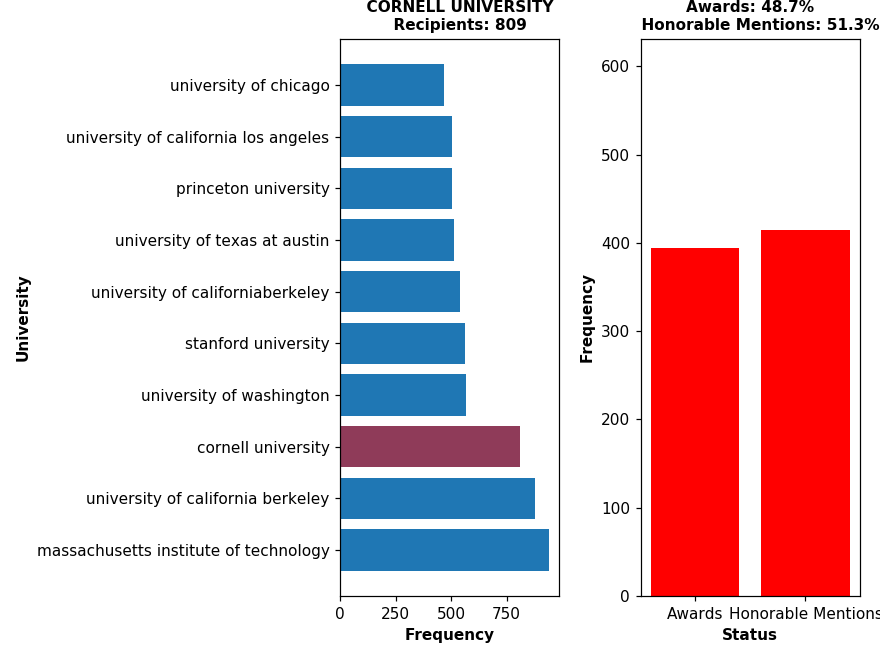

In [32]:
%matplotlib notebook
import matplotlib.pyplot as plt

tol = 465
df_plot = bacc_counts[bacc_counts['Counts'] > tol]
df_x = df_plot.index
df_y = df_plot['Counts']
df_y2 = df_plot['award']
df_y3 = df_plot['mention']

fig, (ax0, ax1) = plt.subplots(1, 2,figsize=(8,6))

ax0.barh(y=df_x, width=df_y, picker=True)
ax0.set_ylabel('University',{'fontsize':10, 'fontweight':'bold'})
ax0.set_xlabel('Frequency',{'fontsize':10, 'fontweight':'bold'})
ax0.set_title('Click on a bar',
             {'fontsize':12, 'fontweight':'bold'})

ax1.set_xlabel('Status',{'fontsize':10, 'fontweight':'bold'})
ax1.set_ylabel('Frequency',{'fontsize':10, 'fontweight':'bold'})
ax1.set_title('Click on a bar',
             {'fontsize':12, 'fontweight':'bold'})

marker0, = ax0.barh(y=df_x[0], width=df_y[0],color='r',alpha=0.5,visible=False)
marker1, = ax1.bar('Awards', df_y2[0],color='r',visible=False)
marker2, = ax1.bar('Honorable Mentions', df_y3[0],color='r',visible=False)

def onpick(event):
    
    art = event.artist
    uni_name = df_plot[df_plot["Counts"] == art.get_width()].index[0]
    
    ax0.set_title(f'''
    {uni_name.upper()}
    Recipients: {int(art.get_width())}''',
    {'fontsize':10, 'fontweight':'bold'})
                 
    marker0.set_visible(True)
    marker0.set_xy(art.xy)
    marker0.set_width(art.get_width())
    
    ax1.set_title(f'''Awards: {np.round(100* (df_y2[uni_name] / art.get_width()),2)}%
    Honorable Mentions: {np.round(100* (df_y3[uni_name] / art.get_width()),2)}%''',
    {'fontsize':10, 'fontweight':'bold'})
    
    marker1.set_visible(True)
    marker1.set_height(df_y2[uni_name])
    
    marker2.set_visible(True)
    marker2.set_height(df_y3[uni_name])
    
    fig.canvas.draw()

fig.canvas.mpl_connect('pick_event', onpick)
plt.tight_layout()
plt.show()

When a bar is picked in the left figure above, the title tells the user the name of the university and the total number of recipients produced. In the right figure, the title summarizes the percentages of awards and honorable mentions out of the total number of recipients. 

What we can observe from this figure is that the top three universities that produce NSF GRFP recipients are Cornell University, University of California Berkeley (UC Berkeley), and Massachusetts Institute of Technology (MIT), with over 750 for each. The split between awards and honorable mentions for Cornell is nearly in half, and for UC Berkeley, it's exactly split in half. However, MIT produced approximately 600 award winners, about 64% of their total.

##### Current Institutions

The same analysis for the baccalaureate institutions is done for current institutions. Here, we investigate the top ten institutions to receive NSF GRFP recipients. These are the universities that benefit from this award.

<IPython.core.display.Javascript object>


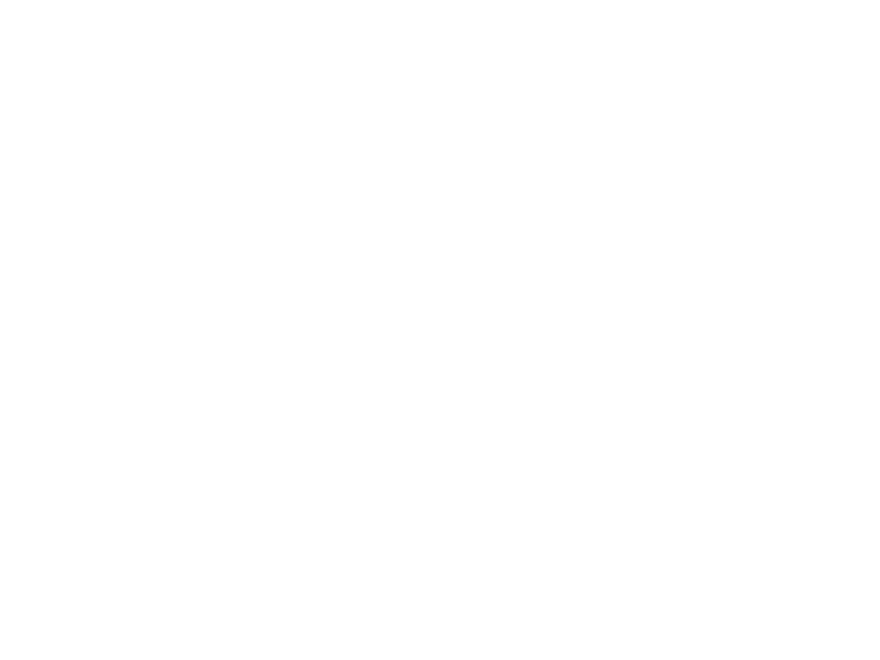

In [29]:
%matplotlib notebook
import matplotlib.pyplot as plt

tol = 650
df_plot = curr_counts[curr_counts['Counts'] > tol]
df_x = df_plot.index
df_y = df_plot['Counts']
df_y2 = df_plot['award']
df_y3 = df_plot['mention']

fig, (ax0, ax1) = plt.subplots(1, 2,figsize=(8,6))

ax0.barh(y=df_x, width=df_y, picker=True)
ax0.set_ylabel('University',{'fontsize':10, 'fontweight':'bold'})
ax0.set_xlabel('Frequency',{'fontsize':10, 'fontweight':'bold'})
ax0.set_title('Click on a bar',
             {'fontsize':12, 'fontweight':'bold'})

ax1.set_xlabel('Status',{'fontsize':10, 'fontweight':'bold'})
ax1.set_ylabel('Frequency',{'fontsize':10, 'fontweight':'bold'})
ax1.set_title('Click on a bar',
             {'fontsize':12, 'fontweight':'bold'})

marker0, = ax0.barh(y=df_x[0], width=df_y[0],color='r',alpha=0.5,visible=False)
marker1, = ax1.bar('Awards', df_y2[0],color='r',visible=False)
marker2, = ax1.bar('Honorable Mentions', df_y3[0],color='r',visible=False)

fig.canvas.mpl_connect('pick_event', onpick)
plt.tight_layout()
plt.show()

Before discussing the results from the figures above, it should be restated that this data arises from user-inputted data when applicants applied for the award. Many of these applicants were undergraduates that, at the time of the application, *may not have even known which schools they would apply to for graduate school.* Therefore, the current institution wasn't recorded. We label these cases as "undecided" current institutions. This leads to an interesting point. Undecided has the most occurences of recipients, twice as many as Stanford University. Since it's out of the scope of this report to learn the whereabouts of these undecided applicants, we will have to assume that these entries would only increase the frequency of occurrences of most universities, and that they rankings and award/honorable mention distributions would stay mostly the same.

The top three universities that received NSF GRFP recipients (over 1100 for each) are UC Berkeley, MIT, and Stanford, with each percentage of awards being about 56%, 63%, and 60%, respectively. For the top university, Stanford received more than 900 award winners in the past ten years.

##### What percentage of NSF GRFP recipients do universities receive?

Next, we look at what percentage of the awards top ten university either produced or earned. We also calculate the cumulative percentage of awards for all ten universities out of all awards given. These figures are not interactive.

<IPython.core.display.Javascript object>


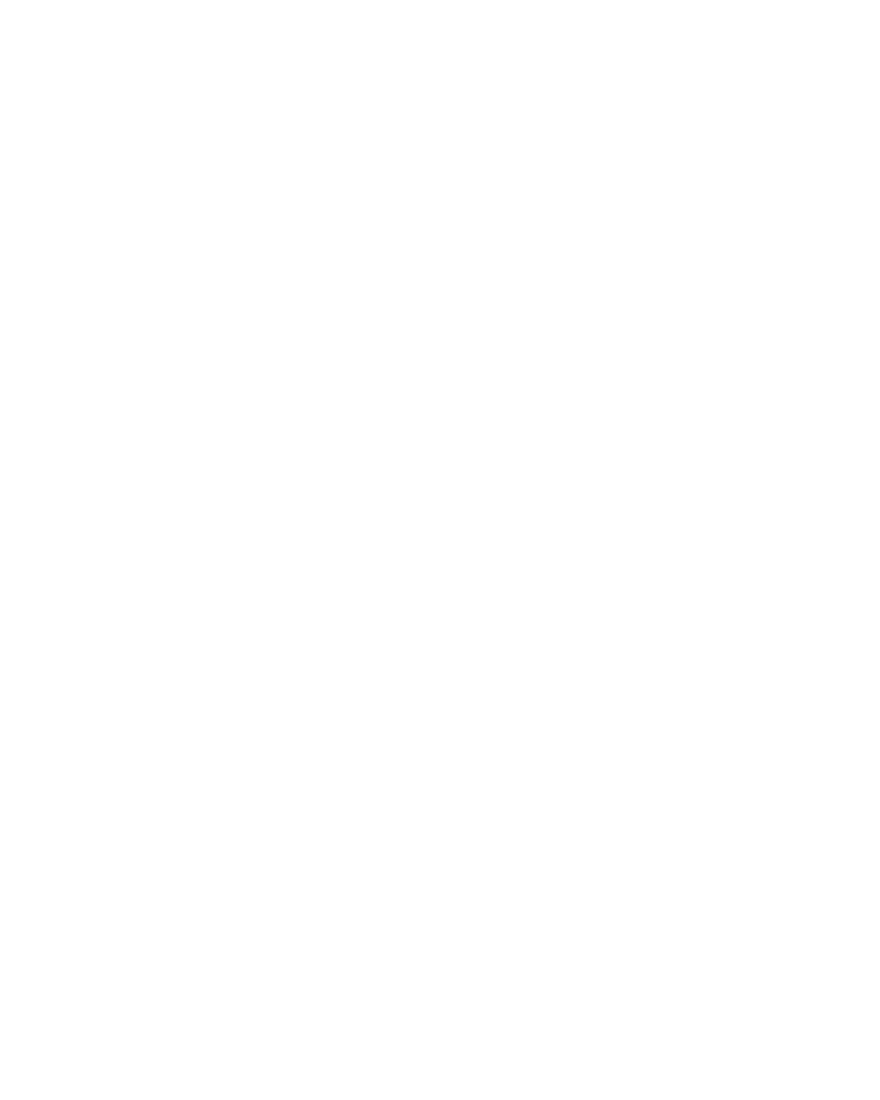

In [30]:
%matplotlib notebook
import matplotlib.pyplot as plt

tol = 340

total = curr_counts.award.sum()
df_plot = curr_counts[curr_counts['award'] > tol]['award'].apply(lambda x: 100 * (x / total))
df_plot = df_plot.drop('undecided')
df_x = df_plot.index
df_y = df_plot.values

fig, (ax0, ax1) = plt.subplots(2, 1,figsize=(8,10))

ax0.barh(y=df_x, width=df_y)
ax0.set_ylabel('University',{'fontsize':10, 'fontweight':'bold'})
ax0.set_xlabel('% of Total',{'fontsize':10, 'fontweight':'bold'})
ax0.set_title(f'''
Top 10 Current Institutions
Cumulative % of Total : {np.round(df_plot.sum(),2)}%
Total awards : {int(total)}''',
             {'fontsize':12, 'fontweight':'bold'})

tol2 = 260

total2 = bacc_counts.award.sum()
df_plot2 = bacc_counts[bacc_counts['award'] > tol2]['award'].apply(lambda x: 100 * (x / total2))
df_x2 = df_plot2.index
df_y2 = df_plot2.values

ax1.barh(y=df_x2, width=df_y2)
ax1.set_ylabel('University',{'fontsize':10, 'fontweight':'bold'})
ax1.set_xlabel('% of Total',{'fontsize':10, 'fontweight':'bold'})
ax1.set_title(f'''
Top 10 Baccalaureate Institutions
Cumulative % of Total : {np.round(df_plot2.sum(),2)}%
Total awards : {int(total2)}''',
             {'fontsize':12, 'fontweight':'bold'})


plt.tight_layout()
plt.show()

In the top figure, we look at the top ten institutions that received NSF GRFP awards. Here we exclude the set of data where the current institution is undecided, and we make the same assumptions that were stated for the previous figure. The top three institutions to receive awards, UC Berkeley, MIT, and Standford hold roughly 3%, 3.75%, and 4.5% of the awards, respectively. The cumulative percentage of all awards that the top ten schools received is about 26%. This is similar to the findings reported in Science, where they determined that 31% of all awards given in 2019 were from the top ten award earning schools. Perhaps, the percentage reported above would grow if we knew more details about the undecided category. 

In the bottom figure, we look at the top ten institutions that produced NSF GRFP awardees. The top three institutions to produce recipeints, Cornell, UC Berkeley, and MIT hold roughly 1.8%, 2.3%, and 2.8% of the numbers of produced recipients. The cumulative percentage of all awards that the top ten schools received is about 17%.

Below, we investigate these percentages in more detail for the top three current institutions.

<IPython.core.display.Javascript object>


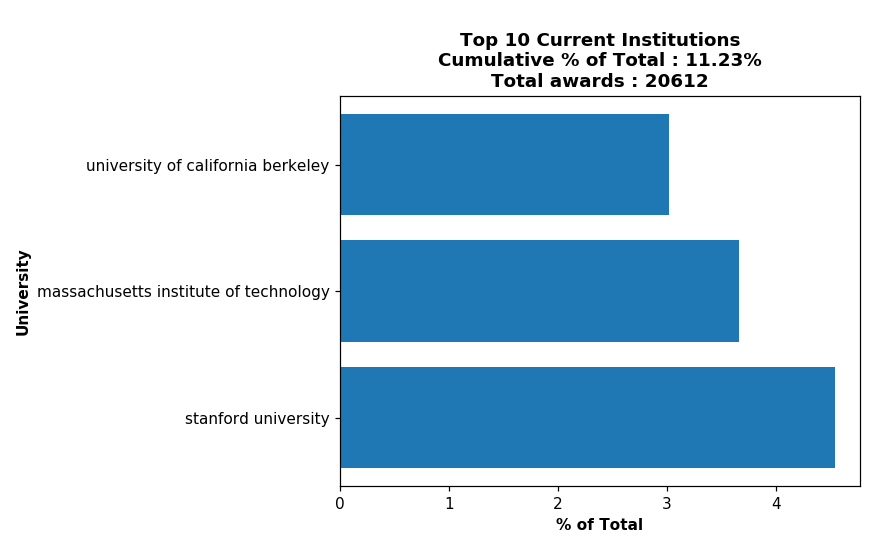

In [31]:
%matplotlib notebook
import matplotlib.pyplot as plt

tol = 600

total = curr_counts.award.sum()
df_plot = curr_counts[curr_counts['award'] > tol]['award'].apply(lambda x: 100 * (x / total))
df_plot = df_plot.drop('undecided')
df_x = df_plot.index
df_y = df_plot.values

fig, ax0 = plt.subplots(1, 1,figsize=(8,5))

ax0.barh(y=df_x, width=df_y)
ax0.set_ylabel('University',{'fontsize':10, 'fontweight':'bold'})
ax0.set_xlabel('% of Total',{'fontsize':10, 'fontweight':'bold'})
ax0.set_title(f'''
Top 10 Current Institutions
Cumulative % of Total : {np.round(df_plot.sum(),2)}%
Total awards : {int(total)}''',
             {'fontsize':12, 'fontweight':'bold'})

plt.tight_layout()
plt.show()

We see above that the cumulative percentage of the total for the top three universities is about 11%. This is also close to findings reported in the Science article from the 2019 award winners. They found the top three schools to also be UC Berkeley, MIT, and Stanford, and the amount of awards this school received made up about 14% of the total awarded in 2019.

### Conclusion

In this report, we investigated the distribution of NSF GRFP award recipients among universities in the United States from 2011 to 2020. The data was extracted from a public website through the NSF, and was organized using Pandas. Before any analysis, the data was formatted to ensure that inconsistencies in university names were removed to count the appropriate number of occurences of a university. Here, we investigated the frequency of universities producing and receiving student recipients of the NSF GRFP award, either by winning an award or an honorable mention. 

These frequencies were plotted in bar charts to display the top ten universities. First, we found Cornell, UC Berkeley, and MIT to be the top three producers of award recipients (baccalaureate institutions), with MIT producing about 600 fellows. The top three universities to receive NSF fellows to pursue doctoral degrees are UC Berkeley, MIT, and Stanford (current institutions), with Stanford receiving roughly 900 fellows. The top ten baccalaureate institutions produced about 17% of the total award winners, and the top ten current institutions (excluding undecided recipients) received about 26% of the award winning fellows, with 11% of the total being received by just the top three universities. These findings showed fascinating similarities to a study report in Science that focused on the award winners from 2019.

Our observations also support the hypothesis that the NSF GRFP award disproportionally goes to top universities, and this may be due to these institutions encouraging a greater number of students to apply. 